<a href="https://colab.research.google.com/github/MohammadRaziei/FMRI-ANS-SUT/blob/master/PYMVPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Multivariate Pattern Analysis Package on Google Colab

## Preface

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
def beep():
  from google.colab import output
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
def replace_in_file(filename,text_to_search,replacement_text):
  import fileinput
  with fileinput.FileInput(filename, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(text_to_search, replacement_text), end='')



## Download required files

Run the cell bellow to download dataset and distribitubale library form for colab:

In [1]:
!pip install wget
!pip install duecredit
!pip install nibabel==2.5.2


import wget
import tarfile


wget.download('https://github.com/HNXJ/AdvNeuroscience/raw/master/mvpa.zip')
f = [wget.download('http://data.pymvpa.org/datasets/haxby2001/stimuli-2010.01.14.tar.gz')]
for i in range(1, 7):
  f.append(wget.download('http://data.pymvpa.org/datasets/haxby2001/subj' + str(i) + '-2010.01.14.tar.gz'))


  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=0698f2a8f8776f9313064462bbafa1f0e5be36d356019142f2428890e5f7ffc1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 174kB 10.3MB/s 
  Created wheel for duecredit: filename=duecredit-0.8.0-cp36-none-any.whl size=76836 sha256=b5bc60fd6ed1c2f2478f42a0563da6dc1486b1582b06cfe065070e37ee73b1cc
  Stored in directory: /root/.cache/pip/wheels/2a/88/56/1fc0eca601df7cef90c52307b76ded4f94c29f7c0ff76cc1d2
Successfully built duecredit
     |████████████████████████████████| 3.3MB 3.3MB/s 
     |████████████████████████████████| 17.4MB 239kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatibl

### Extract files

In [1]:
!mkdir mvpa2
from zipfile import ZipFile 
import tarfile
import os


def extract_zipfile(fname, path):
  with ZipFile(fname, 'r') as zip: 
    # zip.printdir() 
    print('Extracting zip file : ' + fname + ' ...') 
    zip.extractall(path) 
    print('Done!') 
    return


def extract_tarfile(fname, path):
  with tarfile.open(fname, "r:gz") as tar:
    print('Extracting tar file : ' + fname + ' ...') 
    tar.extractall(path)
    print('Done!') 
    return


file_name = "mvpa.zip"  
folder_path1 = 'datadb/haxby2001/'
folder_path2 = 'mvpa2/'
cnt = 0

extract_zipfile(fname=file_name, path=folder_path2)
#for fname in f:
#  cnt += 1
#  extract_tarfile(fname=fname, path=folder_path1)

mkdir: cannot create directory ‘mvpa2’: File exists
Extracting zip file : mvpa.zip ...
Done!


NameError: ignored

### Library test: load dataset

If you got "logsumexp ImportError" try this:

Change from "scipy.misc import logsumexp" to "from scipy.special import logsumexp" in error file (probably "infotheo.py").

In [3]:
try:
  from mvpa2.suite import *
except:
  infotheo_file_path ="/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/infotheo.py"
  replace_in_file(infotheo_file_path, "scipy.misc import logsumexp", "from scipy.special import logsumexp")



subjpath = os.path.join(pymvpa_datadbroot, 'haxby2001', 'subj1')
attrs = SampleAttributes(os.path.join(subjpath, 'labels.txt'),
                          header=True)
ds = fmri_dataset(samples=os.path.join(subjpath, 'bold.nii.gz'),
                   targets=attrs.labels, chunks=attrs.chunks,
                   mask=os.path.join(subjpath, 'mask4_vt.nii.gz'))

print(ds.O.shape)

/content/mvpa2/misc/plot/erp.py:338: DeprecationWarning: invalid escape sequence \m
  xlabel='time (s)', ylabel='$\mu V$',
/content/mvpa2/atlases/fsl.py:141: DeprecationWarning: invalid escape sequence \.
  return re.search('^[0-9]+\.[0-9]', version) is not None


(1452, 40, 64, 64)


## Visualize example

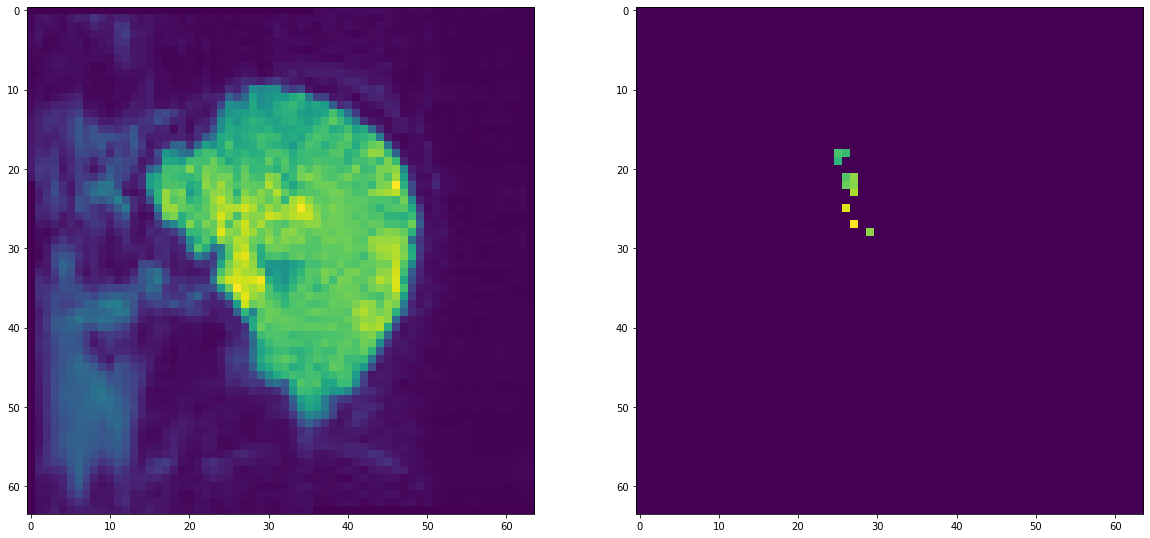

In [6]:
import os, logging
from mvpa2.suite import *
from matplotlib import pyplot as plt 


logging.getLogger("imported_module").setLevel(logging.ERROR)
# subjpath = os.path.join(pymvpa_datadbroot, 'haxby2001', 'subj1')

print("="*30)
subjpath = os.path.join(os.getcwd(),'datadb', 'haxby2001', 'subj1')
attrs = SampleAttributes(os.path.join(subjpath, 'labels.txt'),
                         header=True)

ds1 = fmri_dataset(samples=os.path.join(subjpath, 'bold.nii.gz'),
                  targets=attrs.labels, chunks=attrs.chunks,
                  mask=None)
                  # mask=os.path.join(subjpath, 'mask4_vt.nii.gz'))

ds2 = fmri_dataset(samples=os.path.join(subjpath, 'bold.nii.gz'),
                  targets=attrs.labels, chunks=attrs.chunks,
                  # mask=None)
                  mask=os.path.join(subjpath, 'mask4_vt.nii.gz'))

# Sample plots
fig, ax = plt.subplots(1, 2, figsize=(20, 35))
ax[0].imshow(ds1.O[1, 25, :, :])
ax[1].imshow(ds2.O[1, 25, :, :])
fig.show()

## Correlation example

In [12]:
from mvpa2.measures.corrcoef import pearson_correlation


def normalize(x):
    x = (x - np.min(x))/np.std(x)
    return x


def get_label_dict():
  labels = []
  cats = {}
  with open(os.path.join(subjpath,'labels.txt'), 'r') as f:
      f.readline()
      for i in range(1452):
          s = f.readline().split(' ')
          labels.append((s[0],int(s[1])))
          try:
              cats[s[0]].append(i)
          except:
              cats[s[0]] = [i]
  return labels, cats


def get_corr(cat1, cat2, ds, cats, xx=5, yy=5, maximall_exclude=True, step = 2):
  corr = np.zeros([xx, yy])
  for i in range(0,xx,step):
    for j in range(0,yy,step):
      z = np.mean(ds.O, axis=0).reshape(-1, 1)
      # z = np.mean(ds.O[cats[cat1][i],:,:,:], axis=0).reshape(-1, 1)
      X = ds.O[cats[cat1][i],:,:,:].reshape(-1, 1) - z
      Y = ds.O[cats[cat2][j],:,:,:].reshape(-1, 1) - z

      
      if maximall_exclude:
        z = np.where(z < np.max(z)*0.9)[0]
        X = X[z]
        Y = Y[z]
      
      z = np.union1d( np.where(X > 0)[0], np.where(Y > 0)[0])
      X = normalize(X[z])
      Y = normalize(Y[z])

      corr[i, j] = pearson_correlation(X, Y)
  return corr


def show_colormap_corr(ax, cat1, cat2, ds, xx=5, yy=5, maximall_exclude=True):
  labels, cats = get_label_dict()
  corr = get_corr(cat1=cat1, cat2=cat2, ds=ds, cats=cats, xx=xx, yy=yy, maximall_exclude=maximall_exclude)
  im = ax.imshow(corr, interpolation='None')

  ax.set_title("Correlations between " + cat1 + " and " + cat2)
  ax.set_ylabel(cat1)
  ax.set_xlabel(cat2)
  plt.colorbar(im, ax=ax)
  return


def overall_corr(cat1, cat2, ds, xx=5, yy=5, maximall_exclude=True):
  labels, cats = get_label_dict()
  corr = get_corr(cat1=cat1, cat2=cat2, ds=ds, cats=cats, xx=xx, yy=yy, maximall_exclude=maximall_exclude)
  return np.mean(corr)

KeyboardInterrupt: ignored

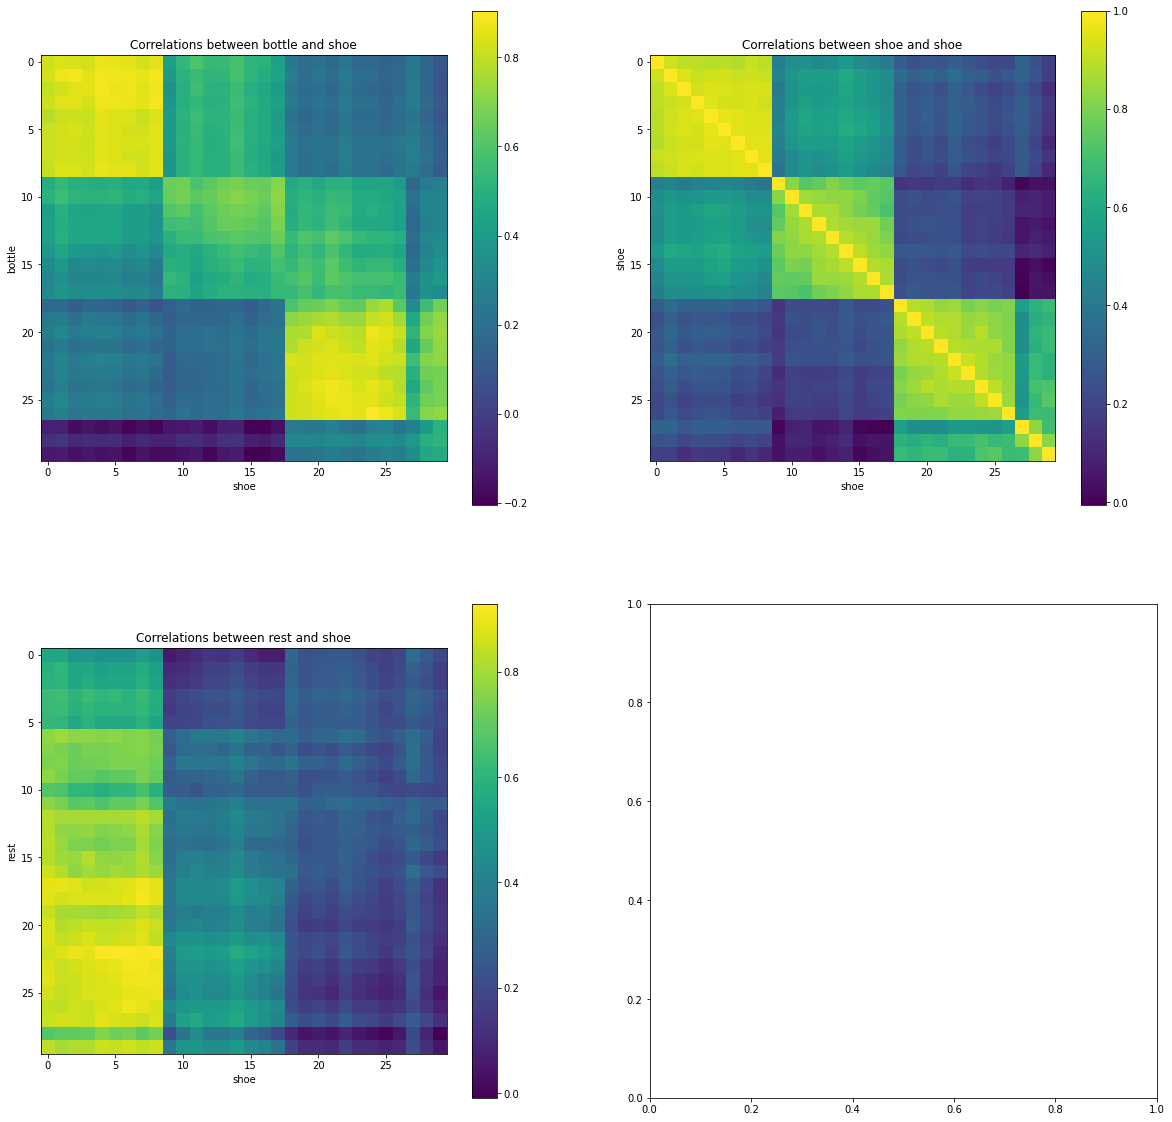

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
x, y = 30, 30

show_colormap_corr(ax=ax[0, 0], cat1="bottle", cat2="shoe", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[0, 1], cat1="shoe", cat2="shoe", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[1, 0], cat1="rest", cat2="shoe", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[1, 1], cat1="bottle", cat2="bottle", ds=ds, xx=x, yy=y)

fig.show()

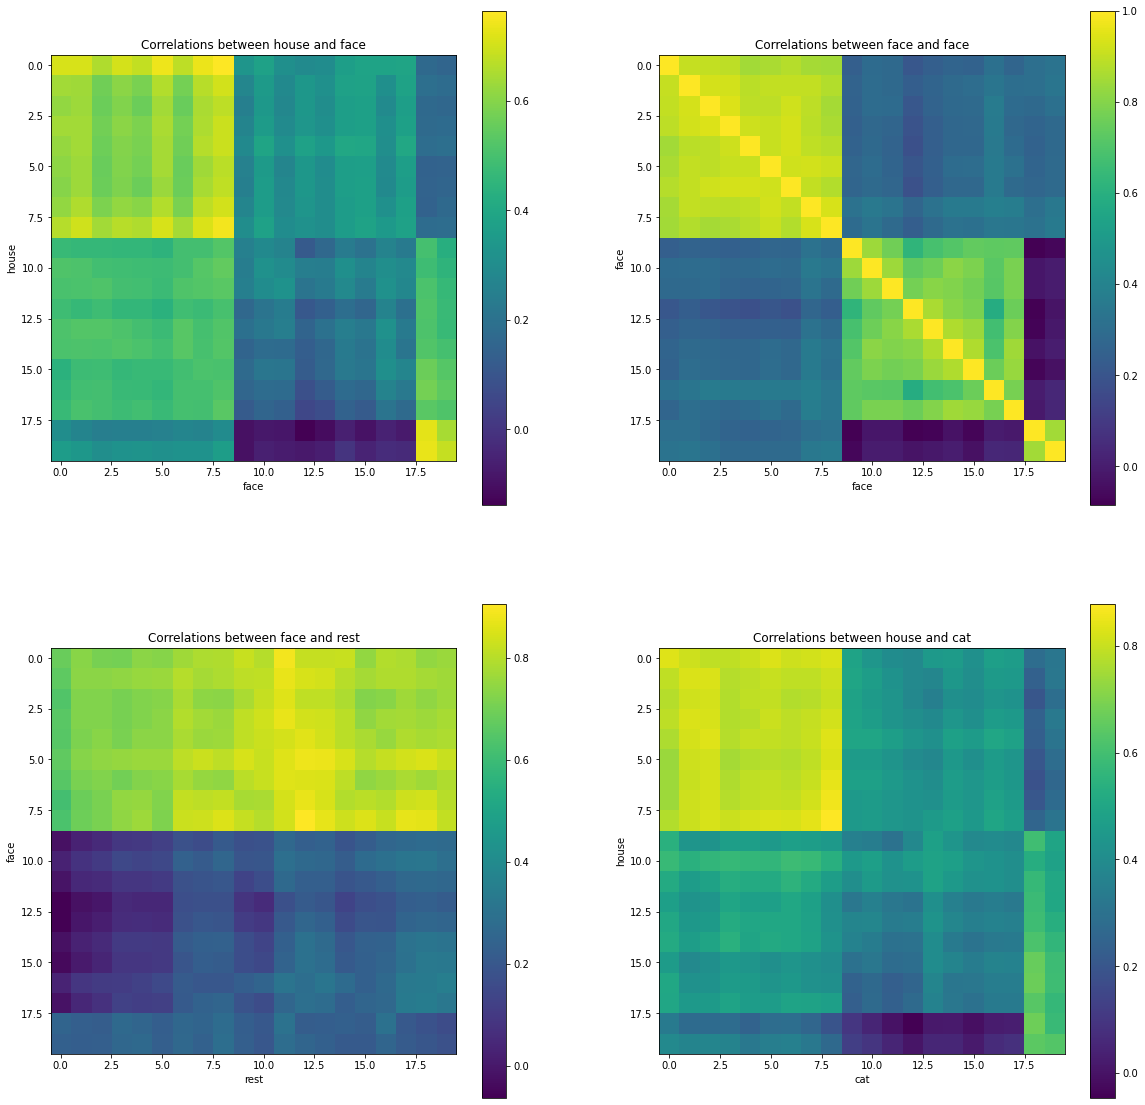

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
x, y = 20, 20

show_colormap_corr(ax=ax[0, 0], cat1="house", cat2="face", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[0, 1], cat1="face", cat2="face", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[1, 0], cat1="face", cat2="rest", ds=ds, xx=x, yy=y)
show_colormap_corr(ax=ax[1, 1], cat1="house", cat2="cat", ds=ds, xx=x, yy=y)

fig.show()

# Within and between category correlations

...

In [ ]:
Corrs = np.zeros([7, 7, 2])
labels, cats = get_label_dict()
cts = list(cats.keys())

for i in range(7):
  for j in range(7):
    print("i: {},  j: {}".format(i,j))
    Corrs[i, j, 0] = overall_corr(cat1=cts[i], cat2=cts[j], ds=ds, xx=24, yy=24, maximall_exclude=True)
    Corrs[i, j, 1] = overall_corr(cat1=cts[i], cat2=cts[j], ds=ds, xx=24, yy=24, maximall_exclude=False)

fig, ax = plt.subplots(1, 2, figsize=(15, 28))

im = ax[0].imshow(Corr[:, :, 0], interpolation='None')
ax[0].set_title("All voxel correlations")
plt.colorbar(im, ax=ax[0])

im = ax[1].imshow(Corr[:, :, 1], interpolation='None')
ax[1].set_title("Maximally excluded voxels correlations")
plt.colorbar(im, ax=ax[1])

fig.show()

beep()

i: 0,  j: 0
i: 0,  j: 1
i: 0,  j: 2
i: 0,  j: 3
i: 0,  j: 4


NameError: ignored

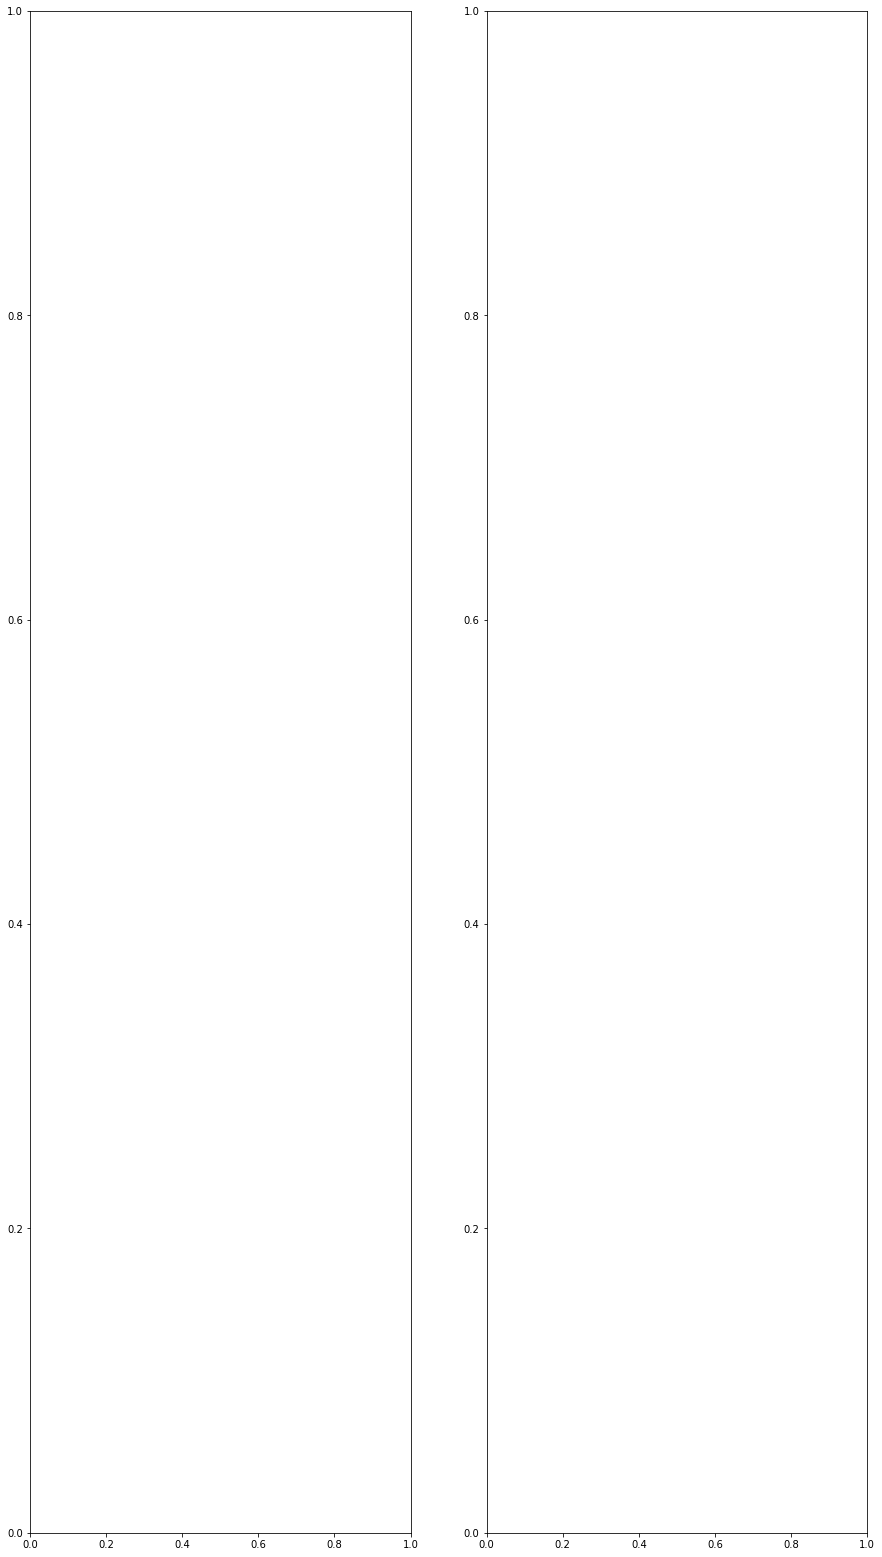

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 28))

im = ax[0].imshow(Corr[:, :, 0], interpolation='None')
ax[0].set_title("All voxel correlations")
plt.colorbar(im, ax=ax[0])

im = ax[1].imshow(Corr[:, :, 1], interpolation='None')
ax[1].set_title("Maximally excluded voxels correlations")
plt.colorbar(im, ax=ax[1])

fig.show()

beep()

In [33]:
labels, cats = get_label_dict()
print(cats)

beep()


{'rest': [0, 1, 2, 3, 4, 5, 15, 16, 17, 18, 19, 20, 30, 31, 32, 33, 34, 44, 45, 46, 47, 48, 58, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 87, 88, 89, 90, 91, 101, 102, 103, 104, 105, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 136, 137, 138, 139, 140, 141, 151, 152, 153, 154, 155, 165, 166, 167, 168, 169, 179, 180, 181, 182, 183, 193, 194, 195, 196, 197, 198, 208, 209, 210, 211, 212, 222, 223, 224, 225, 226, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 257, 258, 259, 260, 261, 262, 272, 273, 274, 275, 276, 286, 287, 288, 289, 290, 300, 301, 302, 303, 304, 314, 315, 316, 317, 318, 319, 329, 330, 331, 332, 333, 343, 344, 345, 346, 347, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 378, 379, 380, 381, 382, 383, 393, 394, 395, 396, 397, 407, 408, 409, 410, 411, 421, 422, 423, 424, 425, 435, 436, 437, 438, 439, 440, 450, 451, 452, 453, 454, 464, 465, 466, 467, 468, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 499, 500, 501, 502, 503,